In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [2]:
def normalizeData(dataMatrix):
    distance_mean = np.mean(dataMatrix)
    distance_sd = np.std(dataMatrix)
    mean_zero = (dataMatrix-distance_mean)/distance_sd
    return mean_zero


In [34]:

# testDistances = pd.read_csv("/home/mikylab/github/stargan/experiments/stargan_identity.bel01/test_distances400.csv")

# testArray = np.asarray(testDistances)

# Y_test = testArray[:, 0]
# predicted_test = np.load('/home/mikylab/github/stargan/experiments/stargan_identity.bel01/svmRETEST400.npy')


# ''' Calculate Correct Test Predictions'''
# class_predictions_test = np.argmax(predicted_test, axis=1)

# correct_test = np.sum(Y_test == class_predictions_test)

# correct_test/class_predictions_test.shape[0]

,0,1869.6516,5428.1587,4904.9517
0,0,1996.2270,5741.0740,8048.9775
1,0,1989.5942,6659.8447,11012.7820
2,0,2045.8169,2191.9546,4882.1357
3,0,1617.7184,4134.9775,9551.4070
4,0,1623.6580,10891.0340,5403.3374
...,...,...,...,...
50604,2,10570.0350,12240.0720,1787.8308
50605,2,11387.9960,6985.1770,2465.2969
50606,2,3236.8364,4781.7256,2924.0261
50607,2,9142.7250,13314.5640,2727.7766


In [36]:
trainDistances = pd.read_csv('experiments/CYTO_060624/CYTO_train_dist061124.csv', header = None)
testDistances = pd.read_csv('experiments/CYTO_060624/CYTO_test_dist061124.csv', header = None)

In [37]:
trainArray = np.asarray(trainDistances)
trainMatrix = trainArray[:, 1:]

X_train = normalizeData(trainMatrix)
Y_train = trainArray[:, 0]

testArray = np.asarray(testDistances)
testMatrix = testArray[:, 1:]


X_test = normalizeData(testMatrix)
Y_test = testArray[:, 0]

In [39]:
def accuracy(truth, predict):
    return (np.sum(truth == predict))/truth.shape[0]

min_x_train = X_train.argmin(axis = 1)
min_x_test = X_test.argmin(axis = 1)

tl_train_acc = accuracy(Y_train, min_x_train)
tl_acc = accuracy(Y_test, min_x_test)
tl_train_acc
tl_acc

0.8765970435616797

In [ ]:
from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier(tol=1e-2, solver="sparse_cg")
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

In [60]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train, Y_train)

reg_pred = reg.predict(X_test)

# correct_test = np.sum(svm100['0'] == reg_pred)

# correct_test/svm100.shape[0]
reg_pred

array([2.56622322, 2.56757474, 3.11101791, ..., 2.56527365, 2.51404543,
       2.53592423])

In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
# clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
#                     hidden_layer_sizes=(5, 2), random_state=1)
# clf.fit(X_train, Y_train)
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)

In [51]:
from sklearn import svm
svm_model = svm.SVC(kernel="poly", degree=3, gamma="auto", C=1.0, probability = True)
svm_model.fit(X_train, Y_train)

svm_pred = svm_model.predict(X_test)

correct_test = np.sum(svm100['0'] == svm_pred)

correct_test/svm100.shape[0]

0.5281

In [58]:
clf_pred = clf.predict(X_test)

correct_test = np.sum(svm100['0'] == clf_pred)

correct_test/svm100.shape[0]

0.5546666666666666

In [39]:
#svm100 = pd.read_csv('svm100_42624.csv')
svm100 = pd.read_csv('experiments/CYTO_/svm300.csv')


correct_test = np.sum(svm100['0'] == svm100['predicted'])

correct_test/svm100.shape[0]

0.5598333333333333

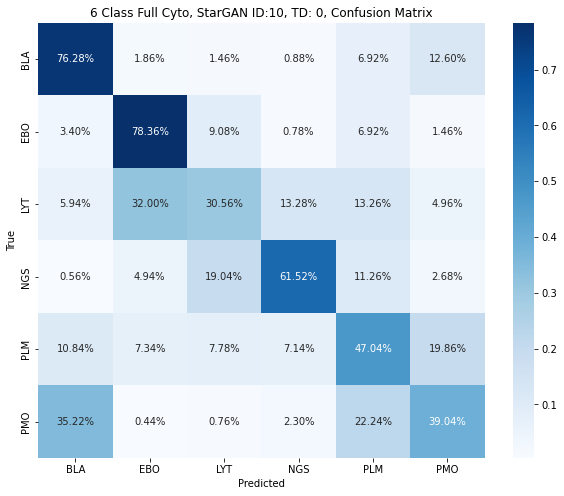

In [57]:
confusion_matrix6 = confusion_matrix(svm100['0'], clf_pred, labels=[0,1, 2, 3, 4, 5])

# Calculate the sum of each row (the number of true samples for each class)
row_sums = confusion_matrix6.sum(axis=1, keepdims=True)


class_labels= ['BLA', 'EBO', 'LYT', 'NGS', 'PLM', 'PMO']


# Normalize the confusion matrix by dividing each element by the sum of its row
normalized_cm = confusion_matrix6 / row_sums

# Plot normalized confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt='.2%', cbar=True, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('6 Class Full Cyto, StarGAN ID:10, TD: 0, Confusion Matrix')
plt.show()


In [286]:

testDistances = pd.read_csv("/home/mikylab/github/stargan/experiments/stargan_identity.class6/retest_distances500.csv", header = None)

testArray = np.asarray(testDistances)

Y_test = testArray[:, 0]
predicted_test = np.load('/home/mikylab/github/stargan/experiments/stargan_identity.class6/svm500_21424.npy')


''' Calculate Correct Test Predictions'''
class_predictions_test = np.argmax(predicted_test, axis=1)

correct_test = np.sum(Y_test == class_predictions_test)

correct_test/class_predictions_test.shape[0]

0.6629339570265896

In [113]:

testDistances = pd.read_csv("/home/mikylab/github/stargan/experiments/ISIC_32024/ISIC_test_dist32024.csv", header = None)

testArray = np.asarray(testDistances)

Y_test = testArray[:, 0]
predicted_test = np.load('/home/mikylab/github/stargan/experiments/ISIC_32024/svm300.npy')


''' Calculate Correct Test Predictions'''
class_predictions_test = np.argmax(predicted_test, axis=1)

correct_test = np.sum(Y_test == class_predictions_test)

correct_test/class_predictions_test.shape[0]

0.5960788682187813

In [114]:
class_predictions_test[class_predictions_test == 1] = 0
Y_test[Y_test == 1] = 0

correct_test = np.sum(Y_test == class_predictions_test)

correct_test/class_predictions_test.shape[0]

0.7957001225353681

In [99]:
R_test = np.array([1, 2, 1, 3, 1])

# Mask the elements equal to 1 and assign the value 0
R_test[R_test == 1] = 0
R_test

array([0, 2, 0, 3, 0])

In [185]:
# df = pd.read_csv(self.subset_dir, header=None)
# subset_indices = df.values.flatten().astype(int).tolist()
testDistances = pd.read_csv("/home/mikylab/github/stargan/experiments/ISIC_3624/ISIC_test_dist3624.csv", header= None)
testDistances#[0].values.flatten().astype(int).tolist()

# 

testDistances['predicted_class'] = class_predictions_test
testDistances.loc[(testDistances[0] == 0) & (testDistances.predicted_class == 0)].index

indices = testDistances.loc[(testDistances[0] == 0) & (testDistances.predicted_class == 0)].index


list(indices[0:10])

#testDistances.to_csv('/home/mikylab/github/stargan/experiments/ISIC_3624/test_subset.csv', index = False)
#pd.read_csv("/home/mikylab/github/stargan/experiments/ISIC_3624/test_subset.csv")


indices

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       4148, 4149, 4150, 4151, 4152, 4153, 4154, 4155, 4156, 4157],
      dtype='int64', length=4137)

In [186]:
ben_sing

,0,1,2,3,predicted_class
0,0,3411.3838,11169.6190,13037.0470,0
1,0,4312.9360,8794.7250,8778.8590,0
2,0,2499.8867,5154.4960,5660.4320,0
3,0,2239.9082,3222.7803,3075.7200,0
4,0,3154.8362,13696.0130,15510.9180,0
...,...,...,...,...,...
4153,0,2578.3420,2805.2722,3049.3818,0
4154,0,3027.7134,3117.0906,3377.7520,0
4155,0,2156.5928,4017.7595,4378.9736,0
4156,0,2445.7283,2503.9556,2358.9365,0


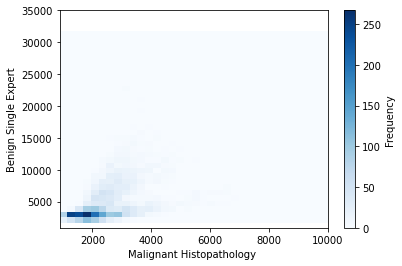

In [235]:
import matplotlib.colors as mcolors
ben_sing= testDistances[testDistances[0] == 0]
ben_hist= testDistances[testDistances[0] == 1]
mal_hist= testDistances[testDistances[0] == 2]


x_max = ben_sing[1].max()
x_min = ben_sing[1].min()
y_max = ben_sing[1].max()
y_min = ben_sing[1].min()

# ben_hist = mal_hist[mal_hist.predicted_class == 1]
# ben_hist

# plt.scatter(mal_hist[2], mal_hist[3], alpha = .2, c = 'blue')

# class_colors = ['blue', 'green', 'red']
# cmap = mcolors.ListedColormap(class_colors)

#plt.scatter(ben_sing[1], ben_sing[3],alpha = .2, c = ben_sing['predicted_class'], cmap = cmap, label = "Benign Single Expert")
# plt.scatter(mal_hist[3], mal_hist[1],alpha = .2, c = mal_hist['predicted_class'], cmap = cmap, label = "Benign Single Expert")



# plt.scatter(ben_hist[2], ben_hist[3],alpha = .2, c = 'orange',label = "Benign Histopathology Expert")
# plt.scatter(mal_hist[2], mal_hist[3],alpha = .2, c = 'red',label = "Malignant Histopathology Expert")
# plt.colorbar(label='Predicted Class')

plt.hist2d(ben_sing[1], ben_sing[2], bins=35, cmap ='Blues')

plt.xlim(x_min,10000)
plt.ylim(y_min,35000)

#plt.hist2d(ben_sing[1], ben_sing[2], bins=35, alpha = .2, cmap ='Blues')

plt.ylabel("Benign Single Expert")
plt.xlabel("Malignant Histopathology ")
plt.colorbar(label='Frequency')
# plt.title("Malignant Images")
# plt.legend()

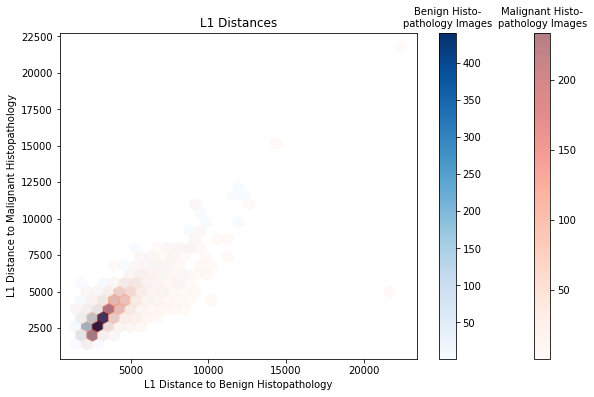

In [260]:
# Plot a hexbin plot of the data. Use for larger image samples. 

x1 = ben_hist[2]
y1 = ben_hist[3]

x2 = mal_hist[2]
y2 = mal_hist[3]

# Define hexbin grid extent
xmin = min(*x1, *x2)
xmax = max(*x1, *x2)
ymin = min(*y1, *y2)
ymax = max(*y1, *y2)
ext = (xmin, xmax, ymin, ymax)

# Draw figure with colorbars
plt.figure(figsize=(10, 6))
hist1 = plt.hexbin(x1, y1, gridsize=30, cmap='Blues', mincnt=1, alpha=1, extent=ext)
hist2 = plt.hexbin(x2, y2, gridsize=30, cmap='Reds', mincnt=1, alpha=.5, extent=ext)

clb2 = plt.colorbar(hist2, orientation='vertical')
clb1 = plt.colorbar(hist1, orientation='vertical')

# Set titles 
clb1.ax.set_title('Benign Histo-\npathology Images',fontsize=10)
clb2.ax.set_title('Malignant Histo-\npathology Images',fontsize=10)
plt.title("L1 Distances")
plt.xlabel("L1 Distance to Benign Histopathology")
plt.ylabel("L1 Distance to Malignant Histopathology")

plt.show()

In [212]:
testDistances = pd.read_csv("/home/mikylab/github/stargan/experiments/stargan_identity.class6/retest_distances500.csv", header = None)
Y_test = np.asarray(testDistances)[:, 0]
testDistances['truth']= Y_test
data = testDistances. drop(0, axis=1)



In [190]:
average_column_wise =testDistances[0:6972].mean(axis=0)


print("Average column-wise:")
print(average_column_wise)

Average column-wise:
0        0.000000
1     2030.105813
2     8300.963548
3    13697.039771
4    21679.366165
5     4971.494900
6     5545.698981
dtype: float64


In [63]:
# train_distances = pd.read_csv("/home/mikylab/github/stargan/experiments/stargan_identity.class6/retest_distances500.csv")
# train_distances

In [98]:
# trainDistances = pd.read_csv(config.train_dist_dir)
# trainArray = np.asarray(trainDistances)
# trainMatrix = trainArray[:, 1:3]

# X_train = normalizeData(trainMatrix)
# Y_train = trainArray[:, 0]

testDistances = pd.read_csv("retest_distances500.csv")
testArray = np.asarray(testDistances)
testMatrix = testArray[:, 1:3]

X_test = normalizeData(testMatrix)
Y_test = testArray[:, 0]

In [99]:
predicted_values_test = np.load('retest_svm500.npy')
class_predictions_test = np.argmax(predicted_values_test, axis =1)

In [100]:
class_num = 5
Y_mask = Y_test[Y_test == class_num]
class_pred_mask = class_predictions_test[Y_test == class_num]

In [101]:
correct_test = np.sum(Y_mask == class_pred_mask)
accuracy = correct_test/Y_mask.shape[0]
print(accuracy)

0.5265942236202459


In [107]:
pd.read_csv("retest_distances500.csv")

,0,1553.0352,4165.671,3522.7744,17582.979,3019.5251,7352.5894
0,0,1622.9788,8188.3430,12876.5680,21882.1900,2277.7966,2456.1907
1,0,2090.6870,4420.7925,39844.6950,45240.2850,1686.7994,4303.0244
2,0,1720.6661,3207.9856,13371.5810,20655.8500,1777.4719,3779.9258
3,0,2249.4146,7789.9434,15673.8740,20229.5000,7213.4834,1668.0385
4,0,1300.1941,10151.9200,1267.1344,3352.8496,3993.6360,8390.7650
...,...,...,...,...,...,...,...
84651,5,7429.5903,13614.9320,34642.0000,41222.4100,3521.1433,1934.4280
84652,5,7807.9927,14335.6600,18161.9160,22686.4920,11105.0680,2409.7373
84653,5,10299.4920,11372.0240,20984.2970,27997.6740,8732.1560,2037.2748
84654,5,4592.3345,10290.9880,17996.3240,20368.7850,4935.4290,1733.5308


In [124]:
incorrect_test = class_pred_mask[Y_mask != class_pred_mask]
incorrect_test

# Count occurrences using np.bincount
counts = np.bincount(incorrect_test)

# Display the counts
unique_values = np.nonzero(counts)[0]
print(list(zip(counts[unique_values], unique_values)))

[(2419, 0), (50, 1), (456, 2), (11, 3), (1197, 4)]


In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix_test = confusion_matrix(Y_test, class_predictions_test, labels=[0,1, 2, 3, 4, 5])


for i in range(len(confusion_matrix_test)):
    class_name = f"Class {i + 1}"
    TP = confusion_matrix_test[i, i]
    TN = np.sum(np.delete(np.delete(confusion_matrix_test, i, axis=0), i, axis=1))
    FP = np.sum(confusion_matrix_test[:, i]) - TP
    FN = np.sum(confusion_matrix_test[i, :]) - TP

    print(f"{class_name}:")
    print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}\n")


Class 1:
TP: 3542, TN: 4348, FP: 471, FN: 616

Class 2:
TP: 2207, TN: 4333, FP: 1744, FN: 693

Class 3:
TP: 612, TN: 6657, FP: 401, FN: 1307

Class 4:
TP: 0, TN: 8977, FP: 0, FN: 0

Class 5:
TP: 0, TN: 8977, FP: 0, FN: 0

Class 6:
TP: 0, TN: 8977, FP: 0, FN: 0



In [58]:
#confusion_matrix6 = confusion_matrix(Y_test, class_predictions_test, labels=[0,1, 2, 3, 4, 5])
confusion_matrix3 = confusion_matrix(Y_test, class_predictions_test, labels=[0,1, 2])



In [53]:
class_predictions_test.shape

(8977,)

In [54]:
np.save("StarGAN_3624", class_predictions_test)

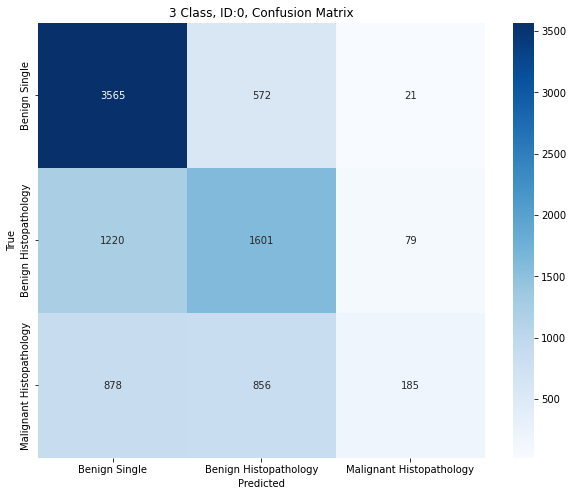

In [61]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
class_labels= ['Benign Single', 'Benign Histopathology', 'Malignant Histopathology']
sns.heatmap(confusion_matrix3, annot=True, cmap='Blues', fmt='g', cbar=True, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('3 Class, ID:0, Confusion Matrix')
plt.show()

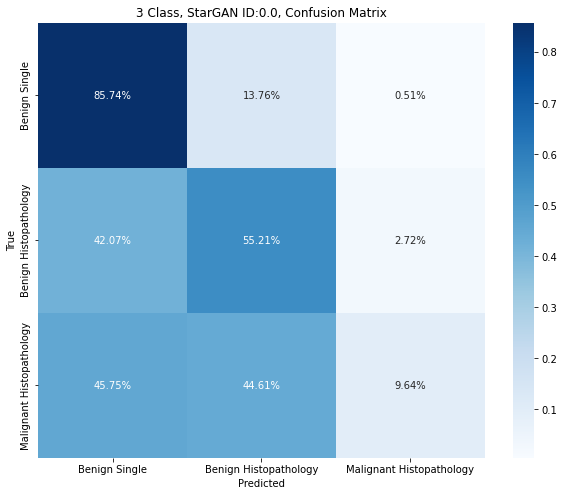

In [62]:
#confusion_matrix6 = confusion_matrix(Y_test, class_predictions_test, labels=[0,1, 2, 3, 4, 5])

# Calculate the sum of each row (the number of true samples for each class)
row_sums = confusion_matrix3.sum(axis=1, keepdims=True)

# Normalize the confusion matrix by dividing each element by the sum of its row
normalized_cm = confusion_matrix3 / row_sums

# Plot normalized confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt='.2%', cbar=True, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('3 Class, StarGAN ID:0.0, Confusion Matrix')
plt.show()


In [31]:
# Given TP, TN, FP, FN values for each class
TP_values = np.array([6733, 21427, 5394, 15805, 889, 2861])
TN_values = np.array([67978, 57632, 58711, 59719, 74479, 73214])
FP_values = np.array([9706, 4629, 4703, 513, 7548, 4448])
FN_values = np.array([239, 968, 15848, 8619, 1740, 4133])

# Calculate accuracy for each class
accuracy_per_class = (TP_values + TN_values) / (TP_values + TN_values + FP_values + FN_values)

# Overall accuracy (average accuracy across all classes)
overall_accuracy = np.mean(accuracy_per_class)

# Print results
for i, class_name in enumerate(["Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6"]):
    print(f"{class_name} Accuracy: {accuracy_per_class[i]:.4f}")

print(f"\nOverall Accuracy: {overall_accuracy:.4f}")


Class 1 Accuracy: 0.8825
Class 2 Accuracy: 0.9339
Class 3 Accuracy: 0.7572
Class 4 Accuracy: 0.8921
Class 5 Accuracy: 0.8903
Class 6 Accuracy: 0.8986

Overall Accuracy: 0.8758


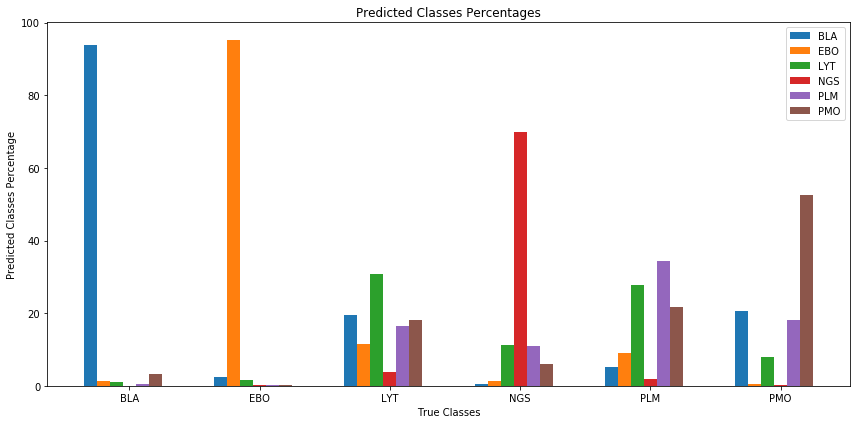

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Define the confusion matrix
conf_matrix = np.array([[6540, 101, 69, 5, 28, 229],
                        [554, 21344, 367, 37, 50, 43],
                        [4115, 2451, 6556, 810, 3477, 3833],
                        [144, 299, 2728, 17102, 2708, 1443],
                        [138, 234, 730, 50, 907, 570],
                        [1433, 39, 551, 19, 1269, 3683]])

# Calculate percentages
total_predictions = np.sum(conf_matrix, axis=1)
percentages = conf_matrix / total_predictions[:, np.newaxis] * 100

# Plotting
plt.figure(figsize=(12, 6))

classes = ['BLA', 'EBO', 'LYT', 'NGS', 'PLM', 'PMO']
bar_width = 0.1
index = np.arange(len(classes))

for i in range(len(classes)):
    plt.bar(index + i * bar_width, percentages[:, i], bar_width, label=classes[i])
    max_index = np.argmax(percentages[:, i])
#     plt.text(index[max_index], bottom[max_index] - percentages[max_index, i] / 2, f'{percentages[max_index, i]:.1f}%', ha='center', va='bottom')

plt.xlabel('True Classes')
plt.ylabel('Predicted Classes Percentage')
plt.title('Predicted Classes Percentages')
plt.xticks(index + 0.3, classes)
plt.legend()
plt.tight_layout()
plt.show()


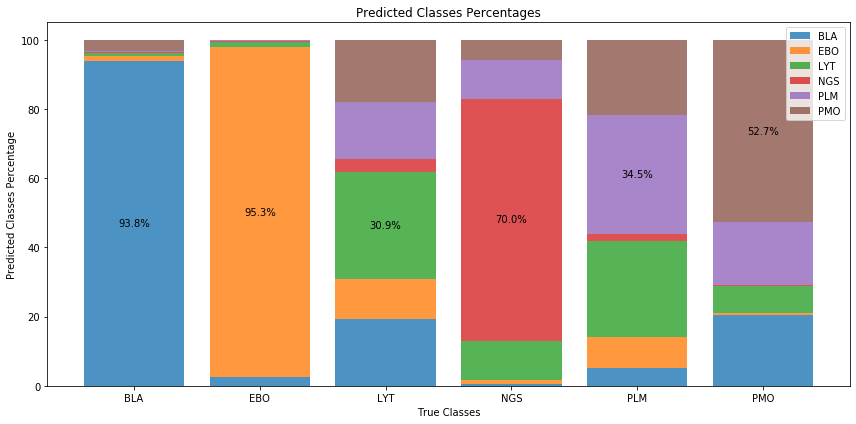

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Define the confusion matrix
conf_matrix = np.array([[6540, 101, 69, 5, 28, 229],
                        [554, 21344, 367, 37, 50, 43],
                        [4115, 2451, 6556, 810, 3477, 3833],
                        [144, 299, 2728, 17102, 2708, 1443],
                        [138, 234, 730, 50, 907, 570],
                        [1433, 39, 551, 19, 1269, 3683]])

# Calculate percentages
total_predictions = np.sum(conf_matrix, axis=1)
percentages = conf_matrix / total_predictions[:, np.newaxis] * 100

# Plotting
plt.figure(figsize=(12, 6))

classes = ['BLA', 'EBO', 'LYT', 'NGS', 'PLM', 'PMO']
index = np.arange(len(classes))

bottom = np.zeros(len(classes))  # Bottom value for stacking bars

for i, cls in enumerate(classes):
    plt.bar(index, percentages[:, i], label=classes[i], bottom=bottom, alpha=0.8)
    bottom += percentages[:, i]

    # Add percentage label for the class with the highest percentage
    max_index = np.argmax(percentages[:, i])
    plt.text(index[max_index], bottom[max_index] - percentages[max_index, i] / 2, f'{percentages[max_index, i]:.1f}%', ha='center', va='center')

plt.xlabel('True Classes')
plt.ylabel('Predicted Classes Percentage')
plt.title('Predicted Classes Percentages')
plt.xticks(index, classes)
plt.legend()
plt.tight_layout()
plt.show()


49.21113023522662
61.56284885018978
17.470520799213887
51.23648869963971
28.527957398250287
33.27137546468401


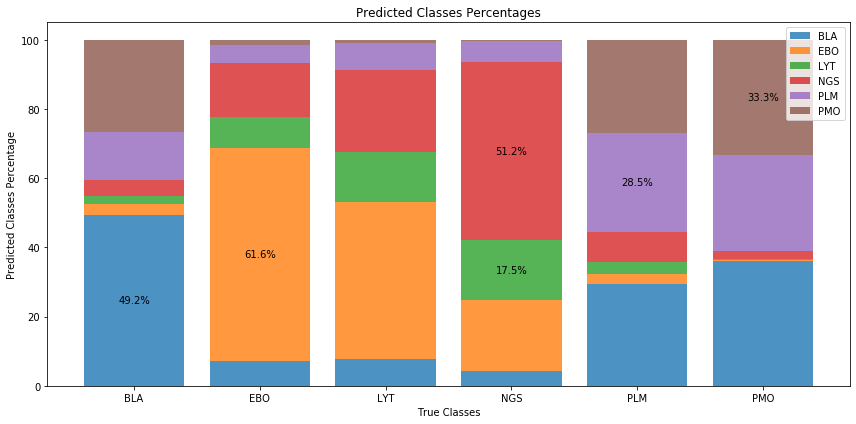

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Define the confusion matrix
conf_matrix = confusion_matrix

# Calculate percentages
total_predictions = np.sum(conf_matrix, axis=1)
percentages = conf_matrix / total_predictions[:, np.newaxis] * 100

# Plotting
plt.figure(figsize=(12, 6))

# classes = ['BLA', 'EBO', 'LYT']
classes = ['BLA', 'EBO', 'LYT', 'NGS', 'PLM', 'PMO']

index = np.arange(len(classes))

bottom = np.zeros(len(classes))  # Bottom value for stacking bars

for i, cls in enumerate(classes):
    plt.bar(index, percentages[:, i], label=classes[i], bottom=bottom, alpha=0.8)
    bottom += percentages[:, i]

    # Add percentage label for the class with the highest percentage
    max_index = np.argmax(percentages[:, i])
    print(percentages[max_index, i])
    plt.text(index[max_index], bottom[max_index] - percentages[max_index, i] / 2, f'{percentages[max_index, i]:.1f}%', ha='center', va='center')

plt.xlabel('True Classes')
plt.ylabel('Predicted Classes Percentage')
plt.title('Predicted Classes Percentages')
plt.xticks(index, classes)
plt.legend()
plt.tight_layout()
plt.show()


In [262]:
# df = pd.read_csv(self.subset_dir, header=None)
# subset_indices = df.values.flatten().astype(int).tolist()
testDistances = pd.read_csv("/home/mikylab/github/stargan/experiments/stargan_identity.bel01/test_distances300.csv", header= None)
testDistances#[0].values.flatten().astype(int).tolist()

# 

# testDistances['predicted_class'] = class_predictions_test
# testDistances.loc[(testDistances[0] == 0) & (testDistances.predicted_class == 0)].index

# indices = testDistances.loc[(testDistances[0] == 0) & (testDistances.predicted_class == 0)].index


# list(indices[0:10])

# #testDistances.to_csv('/home/mikylab/github/stargan/experiments/ISIC_3624/test_subset.csv', index = False)
# #pd.read_csv("/home/mikylab/github/stargan/experiments/ISIC_3624/test_subset.csv")


# indices

,0,1,2,3
0,0,2121.6480,5149.5910,4332.4640
1,0,2817.0380,6967.7876,7647.3680
2,0,2116.4778,6874.3520,11290.4690
3,0,2303.4190,4767.0340,5968.1255
4,0,3040.6965,5952.8940,8998.3370
...,...,...,...,...
113142,2,10439.5330,12393.7680,2557.4683
113143,2,11169.7430,7868.8780,4249.2080
113144,2,4521.3604,3748.3545,2168.0557
113145,2,10365.9220,13922.3350,2842.4272


In [267]:

testDistances = pd.read_csv("/home/mikylab/github/stargan/experiments/stargan_identity.bel01/test_distances300.csv", header= None)

testArray = np.asarray(testDistances)

Y_test = testArray[:, 0]
predicted_test = np.load('/home/mikylab/github/stargan/experiments/stargan_identity.bel01/svm_32524.npy')


''' Calculate Correct Test Predictions'''
class_predictions_test = np.argmax(predicted_test, axis=1)

correct_test = np.sum(Y_test == class_predictions_test)

correct_test/class_predictions_test.shape[0]

0.8759666628368405

In [265]:
predicted_test.shape

(113146, 3)

In [269]:
confusion_matrix_cyto = confusion_matrix(Y_test, class_predictions_test, labels=[0,1, 2])


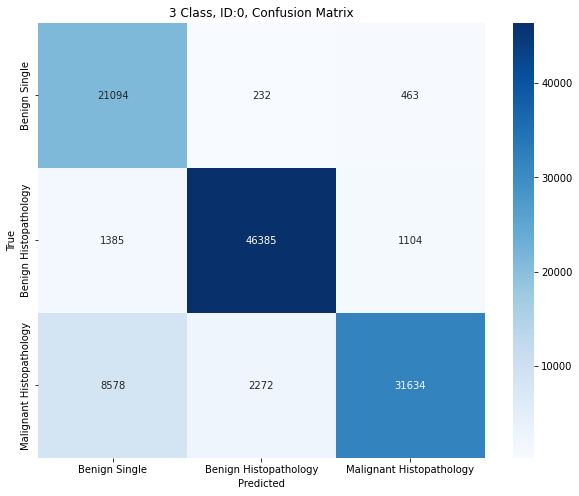

In [270]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
class_labels= ['Benign Single', 'Benign Histopathology', 'Malignant Histopathology']
sns.heatmap(confusion_matrix_cyto, annot=True, cmap='Blues', fmt='g', cbar=True, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('3 Class, ID:0, Confusion Matrix')
plt.show()

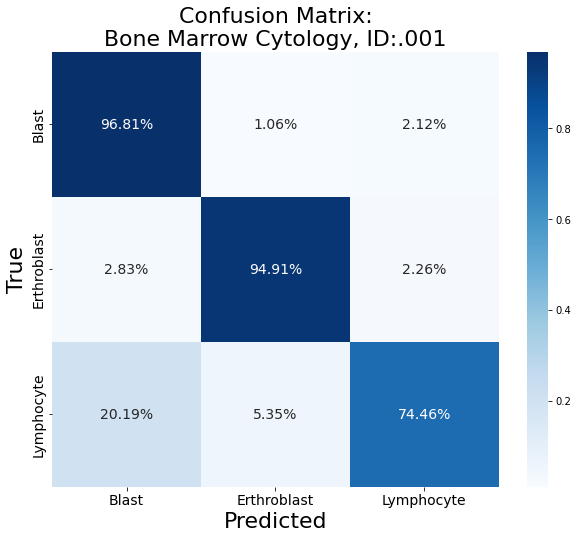

In [282]:
# Calculate the sum of each row (the number of true samples for each class)
row_sums = confusion_matrix_cyto.sum(axis=1, keepdims=True)

# Normalize the confusion matrix by dividing each element by the sum of its row
normalized_cm = confusion_matrix_cyto / row_sums


class_labels= ['Blast', 'Erthroblast', 'Lymphocyte']

# Plot normalized confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt='.2%', cbar=True, xticklabels=class_labels, yticklabels=class_labels, annot_kws={"size": 14})
plt.xlabel('Predicted', fontsize=22)
plt.ylabel('True', fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Confusion Matrix:\nBone Marrow Cytology, ID:.001', fontsize=22)
plt.show()


In [283]:
testDistances['predicted_class'] = class_predictions_test

testDistances.loc[(testDistances[0] == 0) & (testDistances.predicted_class == 0)].index

indices = testDistances.loc[(testDistances[0] == 0) & (testDistances.predicted_class == 0)].index


indices

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       69500, 69501, 69502, 69503, 69504, 69505, 69506, 69507, 69508, 69509],
      dtype='int64', length=21094)

In [289]:
predicted_test.max(axis = 1) < .8

array([False, False, False, ...,  True, False,  True])

In [311]:
testDistances.to_csv('/home/mikylab/github/stargan/experiments/stargan_identity.bel01/test_subset.csv', index = False)
subset_frame = pd.read_csv("/home/mikylab/github/stargan/experiments/stargan_identity.bel01/test_subset.csv")

filtered_df = subset_frame.loc[(subset_frame['0'] == 0) & (subset_frame['predicted_class'] == 0)]
subset_indices = [filtered_df['1'].idxmax()]

subset_frame['2'].idxmax()

subset_frame.iloc[90191]


0                      1.000
1                  21584.238
2                  20000.602
3                  20857.137
predicted_class        2.000
Name: 90191, dtype: float64

In [299]:
subset_frame.iloc[5612]

0                      0.0000
1                   5737.5566
2                  12122.7480
3                   2465.7297
predicted_class        0.0000
Name: 5612, dtype: float64